# Tom and Jerry CNN - Alex Verbesey

In [34]:
import numpy as np
import matplotlib.pylab as plt  
from tensorflow import keras
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, Flatten
from tensorflow.keras.layers import Conv2D, MaxPooling2D
from keras.models import load_model

In [23]:
#Constraints
imageDir = "/Users/alexverbesey/Desktop/ABV-CNN-TJ/tom_and_jerry/tom_and_jerry"

batch_size = 32
img_height = 75
img_width = 75

In [24]:
#Loading datasets and splitting into training and testing

train_ds = keras.utils.image_dataset_from_directory(
    imageDir,
    validation_split=0.2,
    subset="training",
    seed=123,
    image_size=(img_height, img_width),
    batch_size=batch_size)

val_ds = keras.utils.image_dataset_from_directory(
    imageDir,
    validation_split=0.2,
    subset="validation",
    seed=123,
    image_size=(img_height, img_width),
    batch_size=batch_size)

Found 5478 files belonging to 4 classes.
Using 4383 files for training.
Found 5478 files belonging to 4 classes.
Using 1095 files for validation.


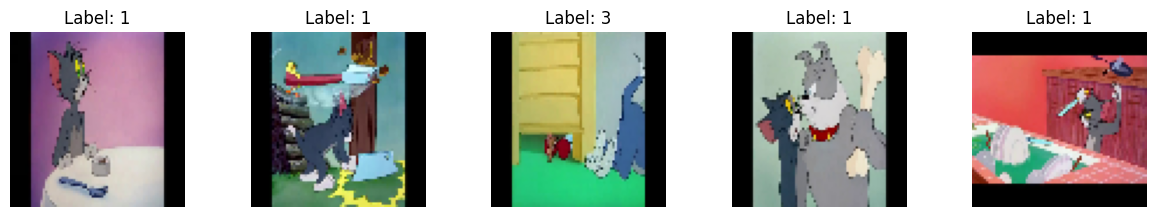

In [25]:
#Checking to make sure the image classes are loaded correctly
plt.figure(figsize=(15, 5))
for i, (images, labels) in enumerate(train_ds.take(1)):
    for j in range(5):
        ax = plt.subplot(2, 5, j + 1)
        plt.imshow(images[j].numpy().astype("uint8"))
        plt.title(f"Label: {labels[j].numpy()}")
        plt.axis("off")
plt.show()

In [26]:
num_classes = len(set(label for _, labels in train_ds for label in labels.numpy()))
print("Number of Classes:", num_classes)
label_categories = {
    0: "Jerry",
    1: "Tom",
    2: "None",
    3: "Both"
}

Number of Classes: 4


2024-09-24 13:20:11.107908: I tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence


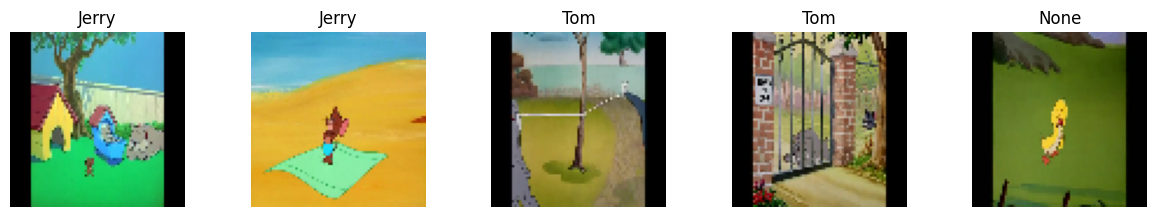

In [27]:
plt.figure(figsize=(15, 5))
for i, (images, labels) in enumerate(train_ds.take(1)):
    for j in range(5):
        ax = plt.subplot(2, 5, j + 1)
        plt.imshow(images[j].numpy().astype("uint8"))
        plt.title(f"{label_categories[labels[j].numpy()]}")
        plt.axis("off")
plt.show()

In [28]:
#Checking the class counts for the training and validation datasets

train_class_counts = {label: 0 for label in label_categories.values()}
val_class_counts = {label: 0 for label in label_categories.values()}

for _, labels in train_ds:
    for label in labels.numpy():
        train_class_counts[label_categories[label]] += 1

for _, labels in val_ds:
    for label in labels.numpy():
        val_class_counts[label_categories[label]] += 1

print("Training Dataset Class Counts:")
for label, count in train_class_counts.items():
    print(f"{label}: {count}")

print("\nValidation Dataset Class Counts:")
for label, count in val_class_counts.items():
    print(f"{label}: {count}")

Training Dataset Class Counts:
Jerry: 1022
Tom: 1530
None: 1216
Both: 615

Validation Dataset Class Counts:
Jerry: 218
Tom: 400
None: 312
Both: 165


# Now that the data is set up, time to train the model.

In [32]:
model = Sequential([
    Conv2D(filters=32, kernel_size=(3, 3), activation='relu', input_shape=(75, 75, 3)),
    MaxPooling2D(pool_size=(2, 2)),
    Conv2D(filters=64, kernel_size=(3, 3), activation='relu'),
    MaxPooling2D(pool_size=(2, 2)),
    Conv2D(filters=128, kernel_size=(3, 3), activation='relu'),
    MaxPooling2D(pool_size=(2, 2)),
    Conv2D(filters=128, kernel_size=(3, 3), activation='relu'),
    MaxPooling2D(pool_size=(2, 2)),
    Flatten(),
    Dense(512, activation='relu'),
    Dropout(0.5),
    Dense(num_classes, activation='softmax')
])

model.compile(optimizer='adam',
                loss='sparse_categorical_crossentropy',
                metrics=['accuracy'])

model.summary()

Model: "sequential_2"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d_8 (Conv2D)               │ (None, 73, 73, 32)     │           896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_8 (MaxPooling2D)  │ (None, 36, 36, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_9 (Conv2D)               │ (None, 34, 34, 64)     │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_9 (MaxPooling2D)  │ (None, 17, 17, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_10 (Conv2D)              │ (None, 15, 15, 128)    │        73,856 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_10 (MaxPooling2D) │ (None, 7, 7, 128)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_11 (Conv2D)              │ (None, 5, 5, 128)      │       147,584 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_11 (MaxPooling2D) │ (None, 2, 2, 128)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_2 (Flatten)             │ (None, 512)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_4 (Dense)                 │ (None, 512)            │       262,656 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_2 (Dropout)             │ (None, 512)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_5 (Dense)                 │ (None, 4)              │         2,052 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 505,540 (1.93 MB)

 Trainable params: 505,540 (1.93 MB)

 Non-trainable params: 0 (0.00 B)

In [36]:
history = model.fit(
    train_ds,
    validation_data=val_ds,
    epochs=20,
    callbacks=[
        keras.callbacks.EarlyStopping(monitor='val_loss', patience=3),
        keras.callbacks.ModelCheckpoint('best_model.keras', save_best_only=True)
    ]
)


Epoch 1/20
137/137 ━━━━━━━━━━━━━━━━━━━━ 8s 55ms/step - accuracy: 0.3121 - loss: 6.3972 - val_accuracy: 0.4046 - val_loss: 1.2884
Epoch 2/20
137/137 ━━━━━━━━━━━━━━━━━━━━ 8s 58ms/step - accuracy: 0.4164 - loss: 1.2780 - val_accuracy: 0.4429 - val_loss: 1.2167
Epoch 3/20
116/137 ━━━━━━━━━━━━━━━━━━━━ 1s 54ms/step - accuracy: 0.5038 - loss: 1.1595

KeyboardInterrupt: 